In [1]:
import numpy as np
from matplotlib import pylab as plt
%autosave 0
%matplotlib inline

Autosave disabled


# Sentimental Analysis 

### What is Sentimental Analysis?

Sentimental Analysis is the technique of analyzing the natural language used in subjective data to perceive and identify emotions. To identify sentiments in survey responses, reviews, social media, email, and many more forms. Sentimental Analysis performed on these textual data helps in finding if the Sentiment is positive or negative. The field of sentimental analysis is also referred to as ‘Opinion Mining’, it often requires some sort of data mining method to obtain the text that will be later performed in a machine learning process.
For example – If we do sentimental analysis in an amazon product review with over 20, 000 reviews, it can be helpful in understanding if consumers are happy about the price or different features of that product. Below is a table which shows an example of how data is extracted. 


| Customer Feedback       | Sentiment | 
| ---                     | ---       |
|“An amazing product for a great price “ | Positive |
|“This product is not worth the price “| Negative |





### Why do we need Sentimental Analysis?

In our modern environment, companies have an enormous amount of data which consists of consumer feedback, social media tags, and many more. It is not possible for a human to manually review those data and that’s where sentiment analysis helps to identify data as positive or negative. Through analyzed data, companies can make decisions about their product or even their future product through a customer’s insight on their upcoming product. Companies which specialize in stock market trading, often use Sentimental Analysis on news, which gives them an upper edge over the market. Since Sentimental Analysis is automated, judgments can be taken based on a significant amount of knowledge rather than plain intuitions, which is not always accurate.

### Our approach is Machine learning-based Sentimental Analysis

Here, we train our algorithm on reviews and match them with the appropriate score. If the score is above 3.5 then it will be considered as 1 or positive and if it’s negative, then it will be below 3.5 then it will be negative or 0. Since Sentimental Analysis is considered a binary classification problem, we have decided to use Random Forest as our base classifier for computing accuracies. Random forest We decided to use the amazon review dataset, to train and compute the accuracy. We found our average accuracies on the data was around 0.90. To compare these accuracies, we decided to implement another binary classification problem classifier, decision trees. In comparison, Decision Tree’s outputted an average accuracy of 0.83. Because a Decision Tee’s stability depends on a single tree whereas the random forest is a combination of different trees. Random forest is better and more accurate with larger datasets and has more stability than decision trees. So we decided to highlight random forest as our base classifier.  

In [5]:
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf 
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from IPython.display import Image

In [6]:
import pandas as pd
import gzip
import json

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [7]:
# feature selection
def select_features(df, max_features):
    X = df['reviewText']
    y = df['overall']

    features = np.array(X.tolist()[:max_features])
    scores = np.array(y.tolist()[:max_features])
    
    # # shuffle the datasets in the same order
    # p = np.random.permutation(max_features)
    # features = features[p]
    # scores = scores[p]

    final_labels = []
    
    # generate labels
    for i in range(len(features)):
        if scores[i] >= 3.5:
            final_labels.append(1)
        else:
            final_labels.append(0)
    final_labels = np.array(final_labels)
    return (features, final_labels)


In [8]:
def create_bow_model(features, max_features):
    # creates an object for each item inside of a given tensor then adds them all into a list
    text_dataset = tf.data.Dataset.from_tensor_slices(features)

    max_features = max_features  # Maximum vocab size.
    max_len = 4  # Sequence length to pad the outputs to.
    embedding_dims = 2

    # # Create the vectorization layer (layer for generating the bag of words) 
    vectorize_layer = TextVectorization(
    max_tokens=max_features,
    output_mode='count')


    # # Now that the vocab layer has been created, call `adapt` on the text-only  
    # # dataset to create the vocabulary.  
    vectorize_layer.adapt(text_dataset.batch(64))
    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
    model.add(vectorize_layer)

    return model

In [9]:
#generate bag of words from selected features
def generate_bow(features, max_features, model):
    input_data = features
    input_data.shape = (max_features, 1)
    features_bow = model.predict(input_data)
    return features_bow

# Random Forest and Decision Tree

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier

In [11]:
def run_random_forest(features, labels):
    classifier = RandomForestClassifier(n_estimators=10)
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)

    classifier.fit(X_train, y_train)

    y_pred = classifier.predict_proba(X_test)
    #calculate f1 scores
    y_pred=y_pred[:,1]>=0.3
    y_pred_int = y_pred.astype(np.int)
    score = f1_score(y_test, y_pred_int)

    return score

In [12]:
def run_decision_tree(features, labels):
    X_train, X_test, y_train, y_test = train_test_split(
        features, labels, test_size=0.33, random_state=42)

    nc = DecisionTreeClassifier(random_state = 2)
    nc.fit(X_train,y_train)

    y_p = nc.predict(X_test)
    return np.mean(y_p)


# Feed Foward Neural Network 

Feedforward neural network is an artificial neural network where the node doe not form connections and it is not a cycle. It is a classification algorithm, where neuron-like units or inputs is categorized in the form of layers. Each unit is connected with the previous. The data enters at the input and flows through the network until it reaches the outputs. When it acts as a classifier to compute the accuracy, no feedback is passed among the nodes of these Layers. Below is an image 

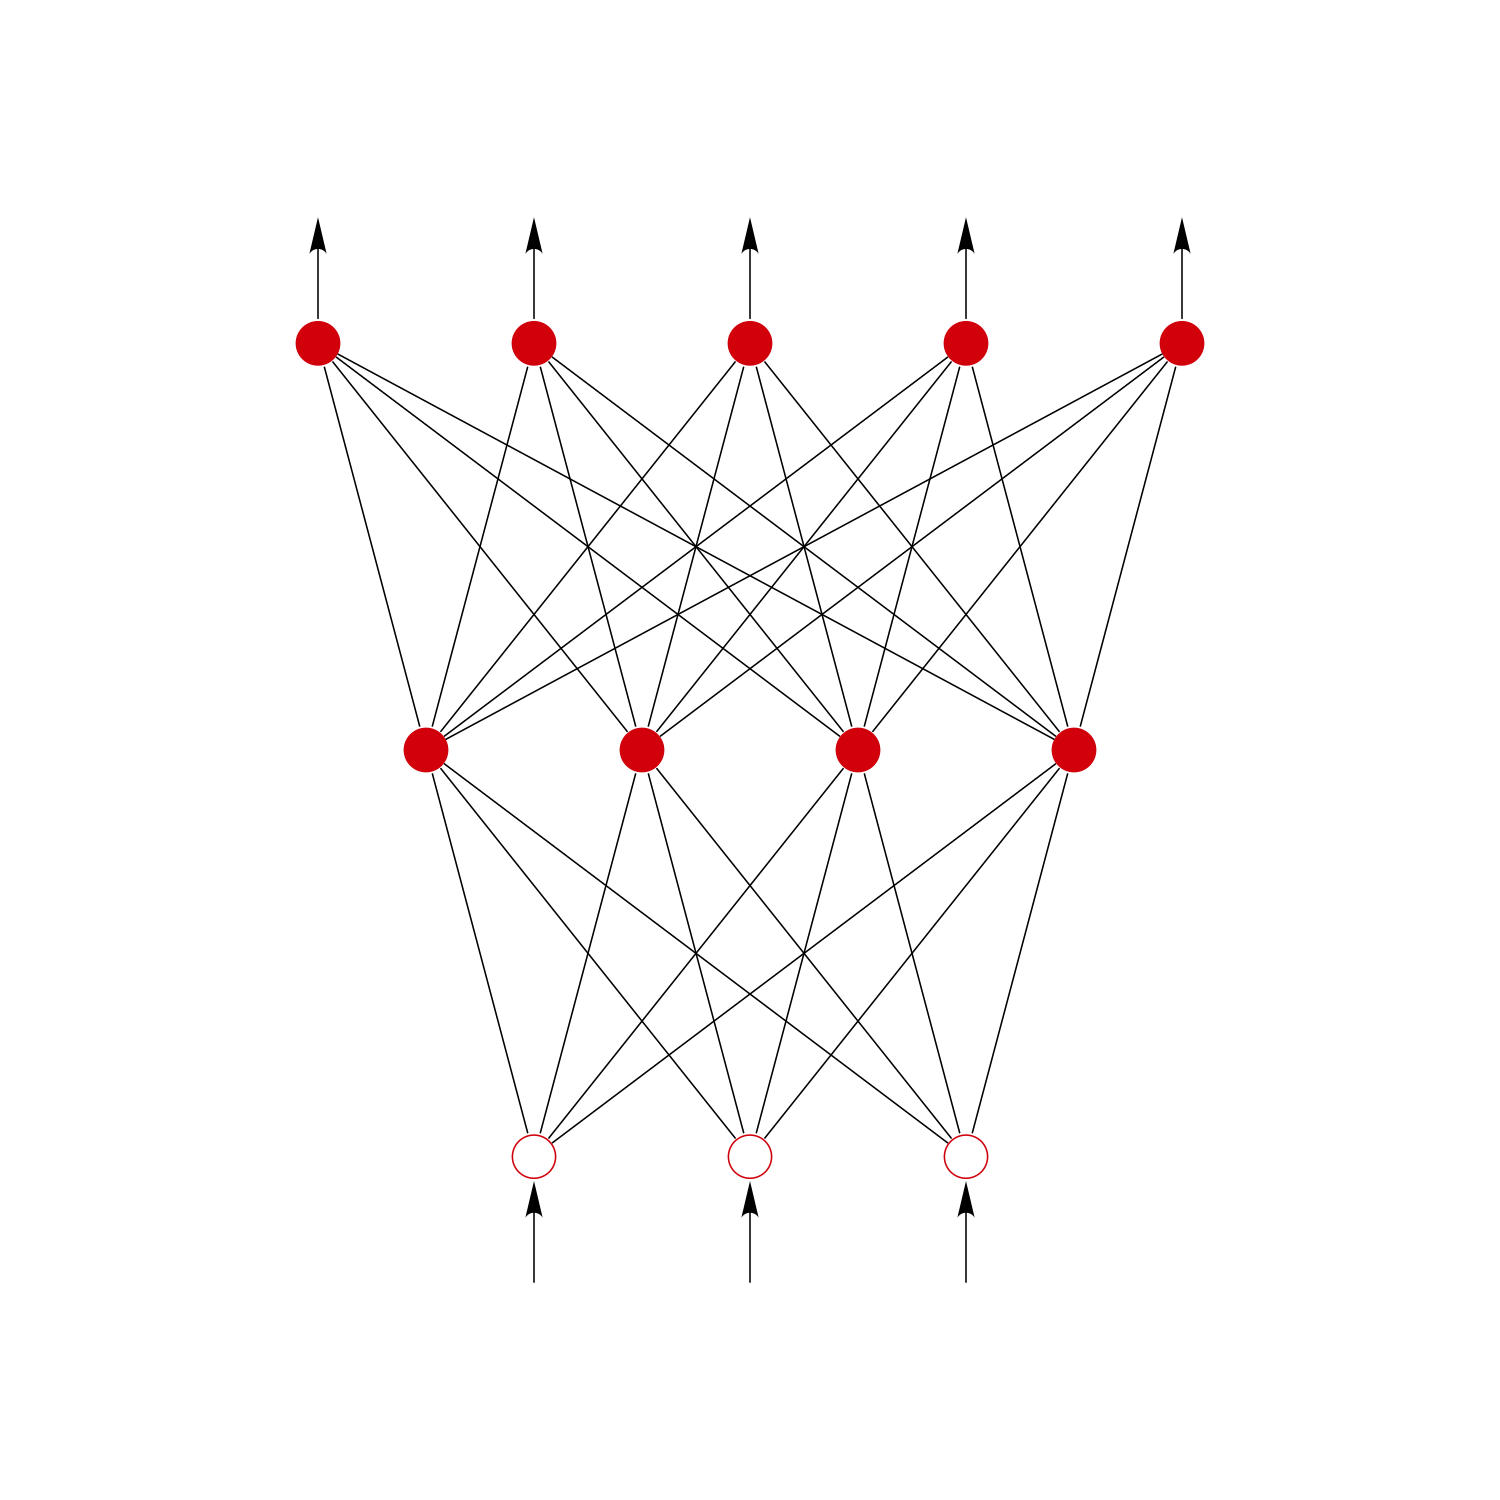

In [17]:
Image(filename = "FF.png", width = 800 , height = 200)

###   Reference 
"Feedforward neural networks 1. What is feedforward neural network ?",26th April,2004.https://www.fon.hum.uva.nl/praat/manual/Feedforward_neural_networks_1__What_is_a_feedforward_ne.html. 7th December 2020.


# Feed Foward Neural Network Implementation

In [14]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Convolution1D, GlobalMaxPooling1D

In [35]:
def build_nn_model():
    model = Sequential()
    #he taught us in class about relu it is more commonly used
    #sigmoid is used for the output layer
    #dense is basically adding layers to yout model for better input and output
    model.add(Dense(12, activation = 'relu'))
    model.add(Dense(8, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))

    #binary_cross used for binary classificaiton problems
    # adam = for gradient descent 
    #metric because this is a classificaiton problem 
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

### Explanation 
A standard straightforward Feedforward neural network can implemented by just adding dense layers to a model. First we start of making a sequential constructor. A sequential constructor is a heap of linear layers. We are going to be using these Dense layers for our input and output parameteres. We have three Dense layers the first two have 12 and 8 nodes with the 'ReLU' as our activation feature. ReLU is a linear function which will output the input directly if it's positive.ReLU is easier to train and performs better. Sigmoid is for outler layer activation. 



While compiling we implemented loss as 'binary_crossentropy' , which is beneficial for binary classificaiton problems.Adam is used an optimizer to determine the gradient descent for problem.It is commonly used for natural language processing. 

In [51]:
def run_ffnn(features, labels, model):
    X_train, X_test, y_train, y_test = train_test_split(
        features, labels, test_size=0.33, random_state=42)

    history = model.fit(X_train, y_train , validation_split = 0.33, epochs = 150 , batch_size = 10)
    loss, accuracy = model.evaluate(X_test, y_test)
    #the lower the loss the closer our predicitons are to the  labels 
    print("Loss = ", loss)
    print("Accuracy = ", accuracy)
    print(history.history.keys()) # we don't need this but just to check for the keys getting stored
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model for Accuracies on Training and Testing set ')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Training', 'Testing'], loc = 'upper left')
    plt.show()
   
    #history object records training metrics for each epochs basically stores the variables 
    #validation split is our test size 

In [15]:
df = getDF('Video_Games_5.json.gz')
max_features = 10000
features, labels = select_features(df, max_features)

# generate a vocabulary (bag of words) for a given set of text features 
bow_model = create_bow_model(features, max_features)
features_bow = generate_bow(features, max_features, bow_model)

In [15]:
random_forest_score = run_random_forest(features_bow, labels)
print(random_forest_score)

0.917925147734734


In [31]:
decision_tree_score = run_decision_tree(features_bow, labels)
print(decision_tree_score)

0.8521212121212122


Train on 4488 samples, validate on 2212 samples
Epoch 1/150
4488/4488 [==============================] - 1s 207us/step - loss: 0.4585 - accuracy: 0.8409 - val_loss: 0.3583 - val_accuracy: 0.8531
Epoch 2/150
4488/4488 [==============================] - 1s 186us/step - loss: 0.2685 - accuracy: 0.8870 - val_loss: 0.3721 - val_accuracy: 0.8671
Epoch 3/150
4488/4488 [==============================] - 1s 188us/step - loss: 0.1751 - accuracy: 0.9334 - val_loss: 0.3756 - val_accuracy: 0.8603
Epoch 4/150
4488/4488 [==============================] - 1s 189us/step - loss: 0.1110 - accuracy: 0.9635 - val_loss: 0.4340 - val_accuracy: 0.8653
Epoch 5/150
4488/4488 [==============================] - 1s 182us/step - loss: 0.0685 - accuracy: 0.9804 - val_loss: 0.5299 - val_accuracy: 0.8662
Epoch 6/150
4488/4488 [==============================] - 1s 190us/step - loss: 0.0430 - accuracy: 0.9880 - val_loss: 0.5890 - val_accuracy: 0.8703
Epoch 7/150
4488/4488 [==============================] - 1s 195us/step

Epoch 56/150
4488/4488 [==============================] - 1s 199us/step - loss: 0.0055 - accuracy: 0.9978 - val_loss: 1.8511 - val_accuracy: 0.8535
Epoch 57/150
4488/4488 [==============================] - 1s 193us/step - loss: 0.0058 - accuracy: 0.9975 - val_loss: 1.7612 - val_accuracy: 0.8486
Epoch 58/150
4488/4488 [==============================] - 1s 194us/step - loss: 0.0057 - accuracy: 0.9973 - val_loss: 1.8696 - val_accuracy: 0.8540
Epoch 59/150
4488/4488 [==============================] - 1s 194us/step - loss: 0.0054 - accuracy: 0.9980 - val_loss: 1.8347 - val_accuracy: 0.8504
Epoch 60/150
4488/4488 [==============================] - 1s 194us/step - loss: 0.0053 - accuracy: 0.9980 - val_loss: 1.8367 - val_accuracy: 0.8490
Epoch 61/150
4488/4488 [==============================] - 1s 194us/step - loss: 0.0057 - accuracy: 0.9975 - val_loss: 1.9310 - val_accuracy: 0.8517
Epoch 62/150
4488/4488 [==============================] - 1s 201us/step - loss: 0.0055 - accuracy: 0.9978 - val_

Epoch 111/150
4488/4488 [==============================] - 1s 203us/step - loss: 0.0051 - accuracy: 0.9982 - val_loss: 2.2171 - val_accuracy: 0.8463
Epoch 112/150
4488/4488 [==============================] - 1s 202us/step - loss: 0.0050 - accuracy: 0.9980 - val_loss: 2.1679 - val_accuracy: 0.8445
Epoch 113/150
4488/4488 [==============================] - 1s 195us/step - loss: 0.0052 - accuracy: 0.9975 - val_loss: 2.1734 - val_accuracy: 0.8445
Epoch 114/150
4488/4488 [==============================] - 1s 199us/step - loss: 0.0052 - accuracy: 0.9975 - val_loss: 2.3365 - val_accuracy: 0.8499
Epoch 115/150
4488/4488 [==============================] - 1s 198us/step - loss: 0.0050 - accuracy: 0.9980 - val_loss: 2.2181 - val_accuracy: 0.8449
Epoch 116/150
4488/4488 [==============================] - 1s 197us/step - loss: 0.0051 - accuracy: 0.9980 - val_loss: 2.3255 - val_accuracy: 0.8467
Epoch 117/150
4488/4488 [==============================] - 1s 197us/step - loss: 0.0051 - accuracy: 0.9980

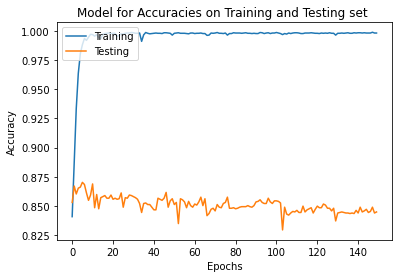

In [52]:
nn_model = build_nn_model()
run_ffnn(features_bow, labels, nn_model)




In [ ]:
df = getDF('Movies_and_TV_5.json.gz')
max_features = 10000
features, labels = select_features(df, max_features)

# generate a vocabulary (bag of words) for a given set of text features 
bow_model = create_bow_model(features, max_features)
features_bow = generate_bow(features, max_features, bow_model)

In [22]:
random_forest_score = run_random_forest(features_bow, labels)
print(random_forest_score)

0.9031182257795564


Train on 4488 samples, validate on 2212 samples
Epoch 1/150
4488/4488 [==============================] - 1s 204us/step - loss: 0.4182 - accuracy: 0.8418 - val_loss: 0.3534 - val_accuracy: 0.8413
Epoch 2/150
4488/4488 [==============================] - 1s 184us/step - loss: 0.2629 - accuracy: 0.8688 - val_loss: 0.3466 - val_accuracy: 0.8644
Epoch 3/150
4488/4488 [==============================] - 1s 182us/step - loss: 0.1699 - accuracy: 0.9403 - val_loss: 0.3999 - val_accuracy: 0.8603
Epoch 4/150
4488/4488 [==============================] - 1s 186us/step - loss: 0.0922 - accuracy: 0.9717 - val_loss: 0.7751 - val_accuracy: 0.8612
Epoch 5/150
4488/4488 [==============================] - 1s 186us/step - loss: 0.0593 - accuracy: 0.9828 - val_loss: 0.5901 - val_accuracy: 0.8617
Epoch 6/150
4488/4488 [==============================] - 1s 202us/step - loss: 0.0335 - accuracy: 0.9918 - val_loss: 0.6285 - val_accuracy: 0.8553
Epoch 7/150
4488/4488 [==============================] - 1s 185us/step

Epoch 110/150
4488/4488 [==============================] - 1s 201us/step - loss: 0.0051 - accuracy: 0.9980 - val_loss: 2.4670 - val_accuracy: 0.8377
Epoch 111/150
4488/4488 [==============================] - 1s 196us/step - loss: 0.0050 - accuracy: 0.9980 - val_loss: 2.5222 - val_accuracy: 0.8373
Epoch 112/150
4488/4488 [==============================] - 1s 201us/step - loss: 0.0051 - accuracy: 0.9978 - val_loss: 2.4772 - val_accuracy: 0.8354
Epoch 113/150
4488/4488 [==============================] - 1s 197us/step - loss: 0.0052 - accuracy: 0.9978 - val_loss: 2.5115 - val_accuracy: 0.8377
Epoch 114/150
4488/4488 [==============================] - 1s 193us/step - loss: 0.0051 - accuracy: 0.9982 - val_loss: 2.5680 - val_accuracy: 0.8377
Epoch 115/150
4488/4488 [==============================] - 1s 201us/step - loss: 0.0049 - accuracy: 0.9980 - val_loss: 2.4654 - val_accuracy: 0.8296
Epoch 116/150
4488/4488 [==============================] - 1s 203us/step - loss: 0.0049 - accuracy: 0.9980

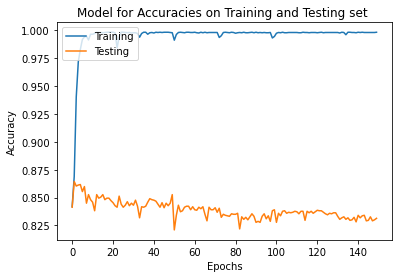

In [53]:
nn_model = build_nn_model()
run_ffnn(features_bow, labels, nn_model)